## NumPy

#### 주요 포인트: 수를 다루는 라이브러리

In [8]:
import numpy as np

t = np.linspace(1,20,10)
t

array([ 1.        ,  3.11111111,  5.22222222,  7.33333333,  9.44444444,
       11.55555556, 13.66666667, 15.77777778, 17.88888889, 20.        ])

## Matplotlib

#### 주요 포인트: 시각화 지원 라이브러리

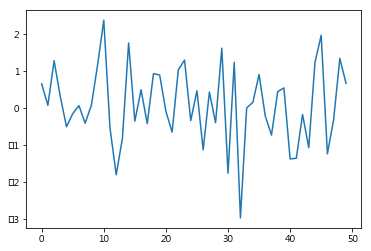

In [9]:
#필요 라이브러리 정의
import numpy as np
import matplotlib.pyplot as plt

# 커맨드뷰에서 차트 시여
%matplotlib inline
# 팝업 창 활용하여 차트 시연
# %matplotlib tk
size = 50
#사이즈만큰 랜덤한 데이터 생성 (정규분포: 평균0, 표준편차1)
y=np.random.standard_normal(size)
x=range(size)
plt.plot(x,y)
plt.show()

## Pandas

#### 주요 포인트: 데이터프레임 핸들링 라이브러리

2019-06-20


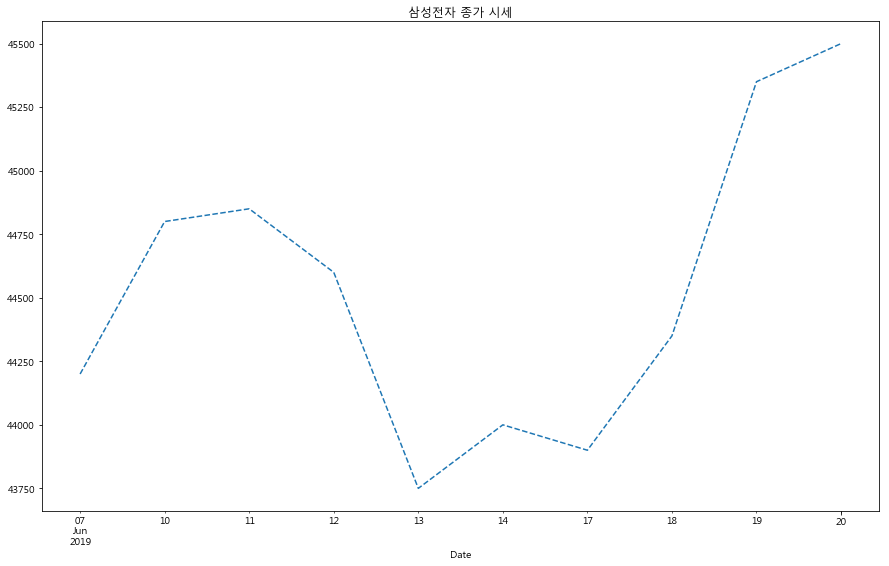

chart ok


In [10]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
start = date.today() - timedelta(14)
yesterday = date.today() - timedelta(1)
print(yesterday)
SEC = web.DataReader("005930", start, yesterday)
SEC['Close'].plot(style='--')
plt.title('삼성전자 종가 시세')
plt.show()

print("chart ok")

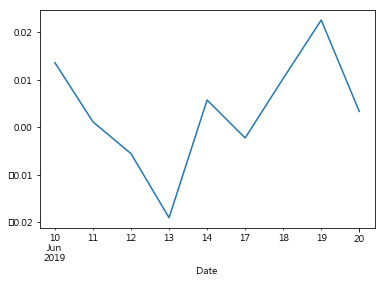

In [11]:
returns = SEC['Close'].pct_change()
returns.plot()

## 주가정보 가져오기

In [12]:
import FinanceDataReader as web         ##web로 별칭을 줌
from datetime import date, timedelta  ##언제 가져온 건지 기준정보를 주기 위해서 날짜정보 필요: datetime
import matplotlib.pyplot as plt  
import datetime

%matplotlib inline

plt.figure(figsize=(15,9)) 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() ##한글 폰트 깨지니깐 설정. 복붙해서 사용하면 돼
rc('font', family=font_name)

<Figure size 1080x648 with 0 Axes>

In [13]:
today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)
#GoogleDailyReader??

2019-06-20


              Open    High     Low   Close  Volume    Change
Date                                                        
2019-06-14  316500  316500  312000  313000   67881 -0.011058
2019-06-17  311500  314000  308000  309000   36986 -0.012780
2019-06-18  309500  316000  309500  314000   68834  0.016181
2019-06-19  316000  318000  313000  315000   51459  0.003185
2019-06-20  315500  317500  315000  317000   46507  0.006349


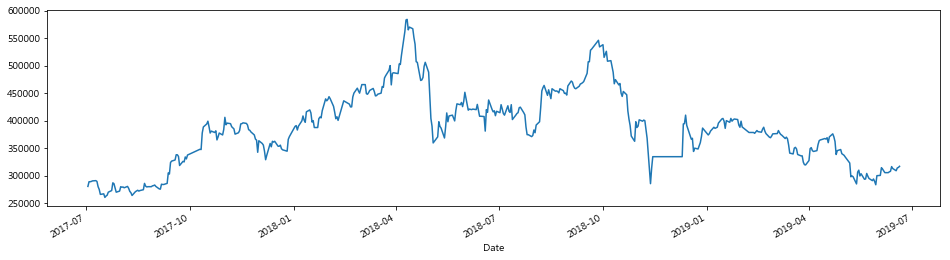

In [14]:
SEC = web.DataReader("207940", startday, yesterday) ##207940 은 주식종목코드
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())
SEC['Close'].plot(figsize=(16,4)) ##Close 라는 컬럼만 가지고 차트를 찍음
plt.show()

In [15]:
#2017년도 3월
SEC['2019-04'].head()

#2017년도 1분기
SEC['2017-01-01':'2017-03-31'].head()

#상반기
SEC[:'2017-06-30'].head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,


###  (2017년도 수정주가 타임시리즈)

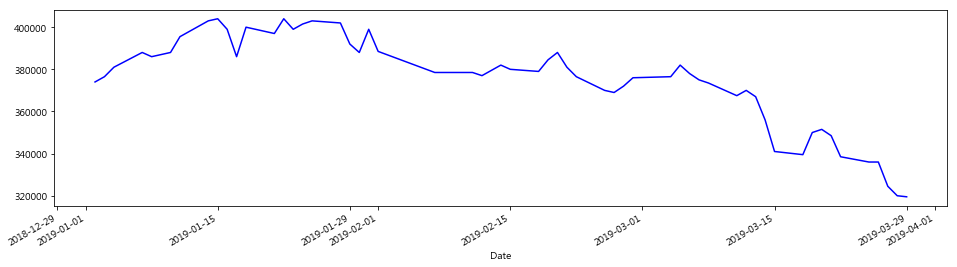

In [16]:
SEC['2019-01-01':'2019-03-31']['Close'].plot(figsize=(16,4), style='b')
plt.show()

### (2017년도 거래량 타임시리즈)

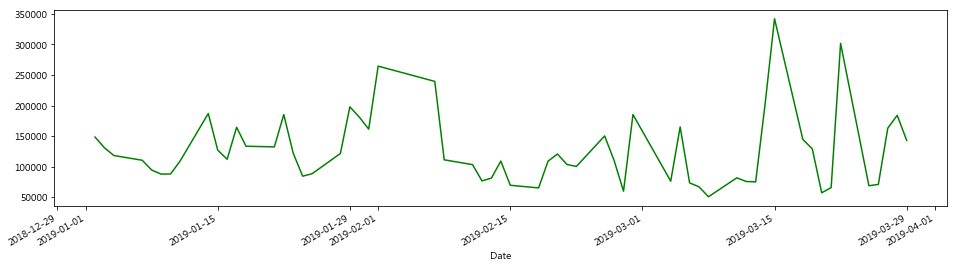

In [17]:
SEC['2019-01-01':'2019-03-31']['Volume'].plot(figsize=(16,4), style='g')
plt.show()

## 수익률 계산

In [33]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
#startday = date(2018,4,1)
#endday = date(2018,6,27)
# plot index
endday = date.today()
startday = date.today() - timedelta(120) 
#SEC = SEC[plot_start:plot_end]

SEC = web.DataReader("035720", startday, endday)

SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()

# 수익률 계산
SEC['Rate'] = np.log( SEC['Close']) - np.log(SEC['Close'].shift(1))
SEC.tail()


,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2019-06-17,125000,125000,121000,121500,349662,-0.028000,-0.028399
2019-06-18,121500,123000,120000,121000,344107,-0.004115,-0.004124
2019-06-19,122500,122500,121000,122000,178919,0.008264,0.008230
2019-06-20,122000,124000,120000,122000,287954,0.000000,0.000000
2019-06-21,124500,128000,124000,126500,685205,0.036885,0.036221


<Figure size 1080x648 with 0 Axes>

In [36]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
#startday = date(2018,4,1)
#endday = date(2018,6,27)
# plot index
endday = date.today()
startday = date.today() - timedelta(120) 
#SEC = SEC[plot_start:plot_end]

SEC = web.DataReader("207940", startday, endday)

SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()

# 수익률 계산
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))
SEC.tail()


,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2019-06-17,311500,314000,308000,309000,36986,-0.012780,-0.012862
2019-06-18,309500,316000,309500,314000,68834,0.016181,0.016052
2019-06-19,316000,318000,313000,315000,51459,0.003185,0.003180
2019-06-20,315500,317500,315000,317000,46507,0.006349,0.006329
2019-06-21,317500,318000,314500,315500,29502,-0.004732,-0.004743


<Figure size 1080x648 with 0 Axes>

In [38]:
SEC['Close'].shift(1)

Date
2019-02-21         NaN
2019-02-22    381000.0
2019-02-25    376500.0
2019-02-26    370000.0
2019-02-27    369000.0
2019-02-28    372000.0
2019-03-04    376000.0
2019-03-05    376500.0
2019-03-06    382000.0
2019-03-07    378000.0
2019-03-08    375000.0
2019-03-11    373500.0
2019-03-12    367500.0
2019-03-13    370000.0
2019-03-14    367000.0
2019-03-15    356000.0
2019-03-18    341000.0
2019-03-19    339500.0
2019-03-20    350000.0
2019-03-21    351500.0
2019-03-22    348500.0
2019-03-25    338500.0
2019-03-26    336000.0
2019-03-27    336000.0
2019-03-28    324500.0
2019-03-29    320000.0
2019-04-01    319500.0
2019-04-02    327500.0
2019-04-03    349000.0
2019-04-04    351000.0
                ...   
2019-05-10    299500.0
2019-05-13    298000.0
2019-05-14    285000.0
2019-05-15    306500.0
2019-05-16    310000.0
2019-05-17    299500.0
2019-05-20    303500.0
2019-05-21    293500.0
2019-05-22    294000.0
2019-05-23    304000.0
2019-05-24    299000.0
2019-05-27    295000.0
2019-0

### 실습: 자연로그수익률 구하기

In [ ]:
SEC['Close_S'] = SEC['Close'].shift(1) ##shift 는 하나 민 값

import numpy as np

##이건 안된다~ SEC["Rate"] = np.log(['Close_S']) - np.log(['Close'])

SEC["Rate"] = np.log(SEC.Close_S) - np.log(SEC.Close)



SEC

,Open,High,Low,Close,Volume,Change,Rate,Close_S
Date,,,,,,,,
2019-02-21,388000,388000,380500,381000,103512,-0.018041,NaN,NaN
2019-02-22,378500,380500,376000,376500,100230,-0.011811,0.011881,381000.0
2019-02-25,376000,376000,368000,370000,150174,-0.017264,0.017415,376500.0
2019-02-26,370500,374000,368500,369000,110041,-0.002703,0.002706,370000.0
2019-02-27,368000,373500,368000,372000,59741,0.008130,-0.008097,369000.0
2019-02-28,374500,376500,372000,376000,185208,0.010753,-0.010695,372000.0
2019-03-04,377000,379500,376500,376500,76117,0.001330,-0.001329,376000.0
2019-03-05,377000,384500,377000,382000,164920,0.014608,-0.014503,376500.0
2019-03-06,382500,382500,376000,378000,73340,-0.010471,0.010526,382000.0


In [21]:
#SEC = SEC.dropna(axis=0)
SEC.head()

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2019-02-21,388000,388000,380500,381000,103512,-0.018041,NaN
2019-02-22,378500,380500,376000,376500,100230,-0.011811,-0.011881
2019-02-25,376000,376000,368000,370000,150174,-0.017264,-0.017415
2019-02-26,370500,374000,368500,369000,110041,-0.002703,-0.002706
2019-02-27,368000,373500,368000,372000,59741,0.008130,0.008097


## 수익률 변동

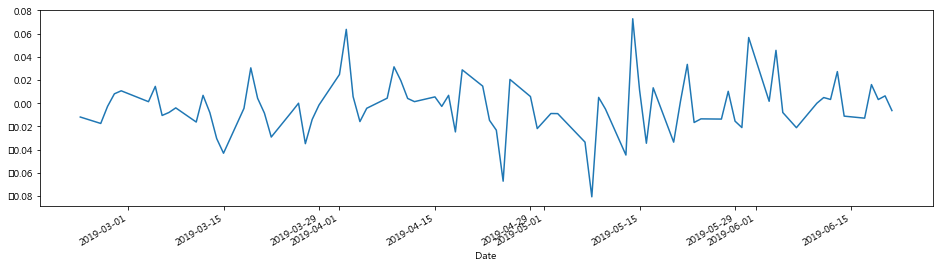

In [22]:
#수익률 변동 계산
#plt.axhline(color='k')
SEC['Rate'].plot(figsize=(16,4))
plt.show()

In [23]:
SEC.describe()

,Open,High,Low,Close,Volume,Change,Rate
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,82.000000
mean,335126.506024,340000.000000,330945.783133,335078.313253,119905.084337,-0.002213,-0.002320
std,29891.556375,28945.280588,30154.784845,29591.371716,83320.786358,0.024465,0.024554
min,284000.000000,291500.000000,281000.000000,283500.000000,28555.000000,-0.077399,-0.080559
25%,307250.000000,313250.000000,304750.000000,307500.000000,68920.000000,-0.014967,-0.014543
50%,338000.000000,343000.000000,335500.000000,338500.000000,99281.000000,-0.002721,-0.002716
75%,365750.000000,368500.000000,360500.000000,365250.000000,143303.000000,0.006812,0.006794
max,388000.000000,388000.000000,380500.000000,382000.000000,539282.000000,0.075439,0.072729


### (수익률 분포)

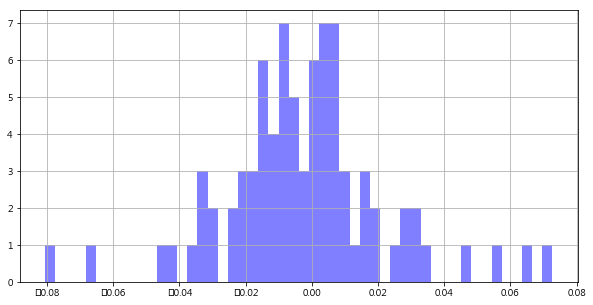

In [24]:
# 수익률의 분포
SEC['Rate'].hist(bins=50, color='b', alpha=0.5, figsize = (10,5))
plt.show()

## 이동평균

In [25]:
SEC['MA_5']=SEC['Close'].rolling(window=5).mean()
SEC['MA_20']=SEC['Close'].rolling(window=20).mean()
SEC['diff']=SEC['MA_5']-SEC['MA_20']
SEC.tail(5)
    

,Open,High,Low,Close,Volume,Change,Rate,MA_5,MA_20,diff
Date,,,,,,,,,,
2019-06-17,311500,314000,308000,309000,36986,-0.012780,-0.012862,310700.0,301750.0,8950.0
2019-06-18,309500,316000,309500,314000,68834,0.016181,0.016052,312100.0,302775.0,9325.0
2019-06-19,316000,318000,313000,315000,51459,0.003185,0.003180,313500.0,303825.0,9675.0
2019-06-20,315500,317500,315000,317000,46507,0.006349,0.006329,313600.0,304475.0,9125.0
2019-06-21,317500,318000,314500,315000,28555,-0.006309,-0.006329,314000.0,305275.0,8725.0


## 골든크로스, 데드크로스

In [26]:
SEC = SEC[ ['Open','High','Low','Close','Volume','MA_5','MA_20','diff']]

In [27]:
SEC.tail()

,Open,High,Low,Close,Volume,MA_5,MA_20,diff
Date,,,,,,,,
2019-06-17,311500,314000,308000,309000,36986,310700.0,301750.0,8950.0
2019-06-18,309500,316000,309500,314000,68834,312100.0,302775.0,9325.0
2019-06-19,316000,318000,313000,315000,51459,313500.0,303825.0,9675.0
2019-06-20,315500,317500,315000,317000,46507,313600.0,304475.0,9125.0
2019-06-21,317500,318000,314500,315000,28555,314000.0,305275.0,8725.0


In [28]:
pre_key = prev_val = 0
for key,val in SEC['diff'][1:].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        print('[golden]', key, val)
    if val * prev_val < 0 and val < prev_val:
        print('[dead]', key, val)
    prev_key, prev_val = key, val

[golden] 2019-04-08 00:00:00 3975.0
[dead] 2019-04-29 00:00:00 -5150.0
[golden] 2019-06-05 00:00:00 3475.0


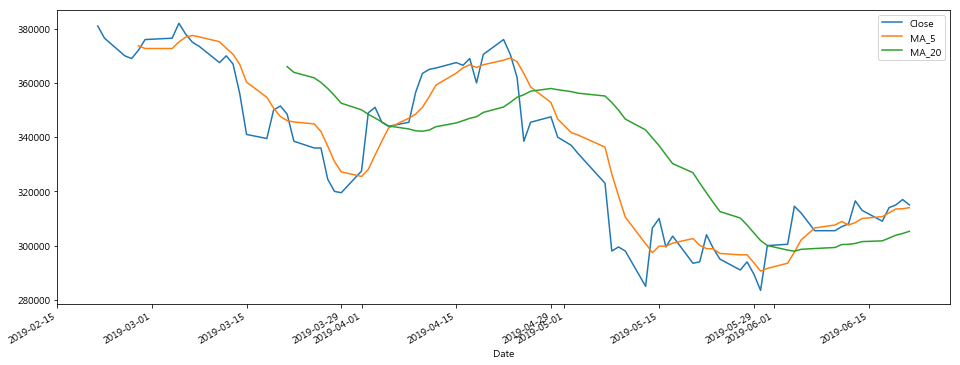

In [29]:
ax=SEC[['Close','MA_5','MA_20']].plot(figsize = (16,6))


In [31]:
SEC.tail()

,Open,High,Low,Close,Volume,MA_5,MA_20,diff
Date,,,,,,,,
2018-06-21,420000,426000,411000,415000,152920.0,406300.0,419600.0,-13300.0
2018-06-22,419500,445500,415500,437500,344810.0,412200.0,421500.0,-9300.0
2018-06-25,438000,438500,418000,420500,165000.0,414800.0,421625.0,-6825.0
2018-06-26,410000,419000,400500,416000,217020.0,421800.0,420900.0,900.0
2018-06-27,414500,426500,413000,418000,115660.0,421400.0,420350.0,1050.0


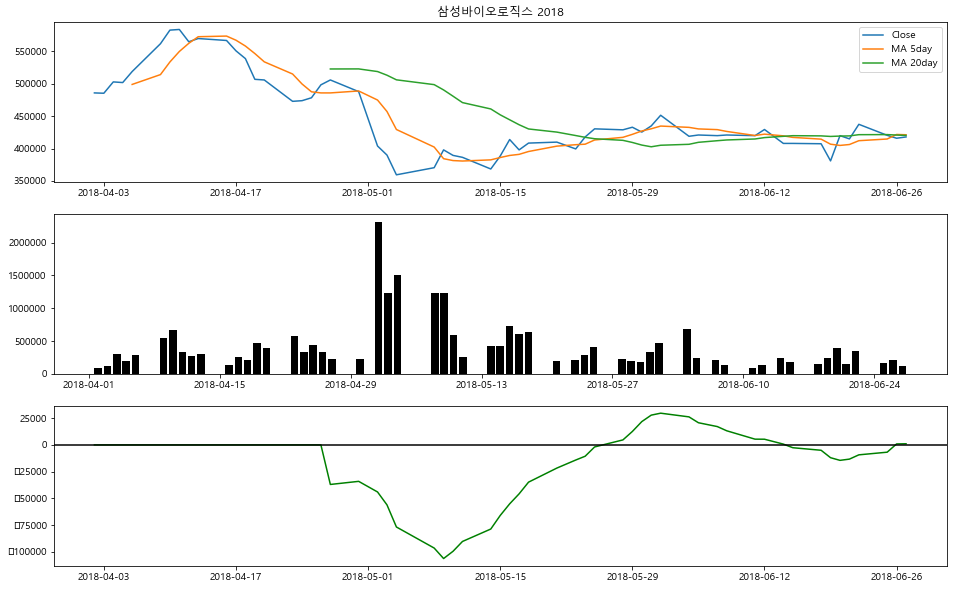

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(u'삼성바이오로직스 2018')
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')